# Análisando Filmes

Notebook com análises de filmes e fazendo previsões

In [1]:
#importando pandas para trabalhar com a fontes de dados
import pandas as pd

In [2]:
#fazendo a importação de dados, no formato de csv, via web
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

#criando o df
df_filmes = pd.read_csv(uri_filmes)

#alterando os nomes das colunas do df
df_filmes.columns = ['id_filme', 'titulo', 'generos']

#mostrando o top 5
df_filmes.head()

,id_filme,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#extraindo os dummies do dataframe
generos = df_filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#concatenar os dfs
df_filmes_comp = pd.concat([df_filmes, generos], axis=1)
df_filmes_comp.head()


,id_filme,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#importando sklearn
from sklearn.preprocessing import StandardScaler

In [6]:
#instanciando um objeto
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [7]:
#importando o kmeans para fazer agrupamento
from sklearn.cluster import KMeans

In [8]:
#instanciando o objeto
modelo = KMeans(n_clusters=3)

#fazendo o treino do modelo
modelo.fit(generos_escalados)
#imprimindo os rotulos que o algoritmo pegou
print('Grupos {} .'.format(modelo.labels_))

Grupos [1 1 0 ... 0 1 0] .


In [9]:
#imprimindo o centro de cada grupo
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.04058317 -0.31528974 -0.23346841 -0.25154216 -0.26907798  0.25345861
  -0.17553104  0.14497899  0.20985193 -0.16849189 -0.07653233 -0.27647479
  -0.10784836  0.02840557 -0.18232435  0.22499523 -0.25849754 -0.46983391
   0.10644246  0.04523903]
 [-0.05917995  0.12755776  1.11205081  1.93727255  2.12120532  0.16103537
  -0.32459453 -0.19989888 -0.59904787  1.20685643 -0.09492563 -0.27935538
   0.31262659  0.31347518 -0.13742387 -0.27238059  0.14223653 -0.47049038
  -0.16908435 -0.08985123]
 [-0.05917995  0.58660518  0.04585715 -0.23279335 -0.26768416 -0.57220049
   0.47762375 -0.21581042 -0.1941342  -0.12126679  0.19045464  0.66375242
   0.09795312 -0.17692158  0.41985061 -0.34936914  0.46656496  1.12634488
 

In [10]:
#transformando dados em um dataframe
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.040583,-0.315290,-0.233468,-0.251542,-0.269078,0.253459,-0.175531,0.144979,0.209852,-0.168492,-0.076532,-0.276475,-0.107848,0.028406,-0.182324,0.224995,-0.258498,-0.469834,0.106442,0.045239
1,-0.059180,0.127558,1.112051,1.937273,2.121205,0.161035,-0.324595,-0.199899,-0.599048,1.206856,-0.094926,-0.279355,0.312627,0.313475,-0.137424,-0.272381,0.142237,-0.470490,-0.169084,-0.089851
2,-0.059180,0.586605,0.045857,-0.232793,-0.267684,-0.572200,0.477624,-0.215810,-0.194134,-0.121267,0.190455,0.663752,0.097953,-0.176922,0.419851,-0.349369,0.466565,1.126345,-0.149925,-0.056851


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7f01cf6a0>,
      dtype=object)

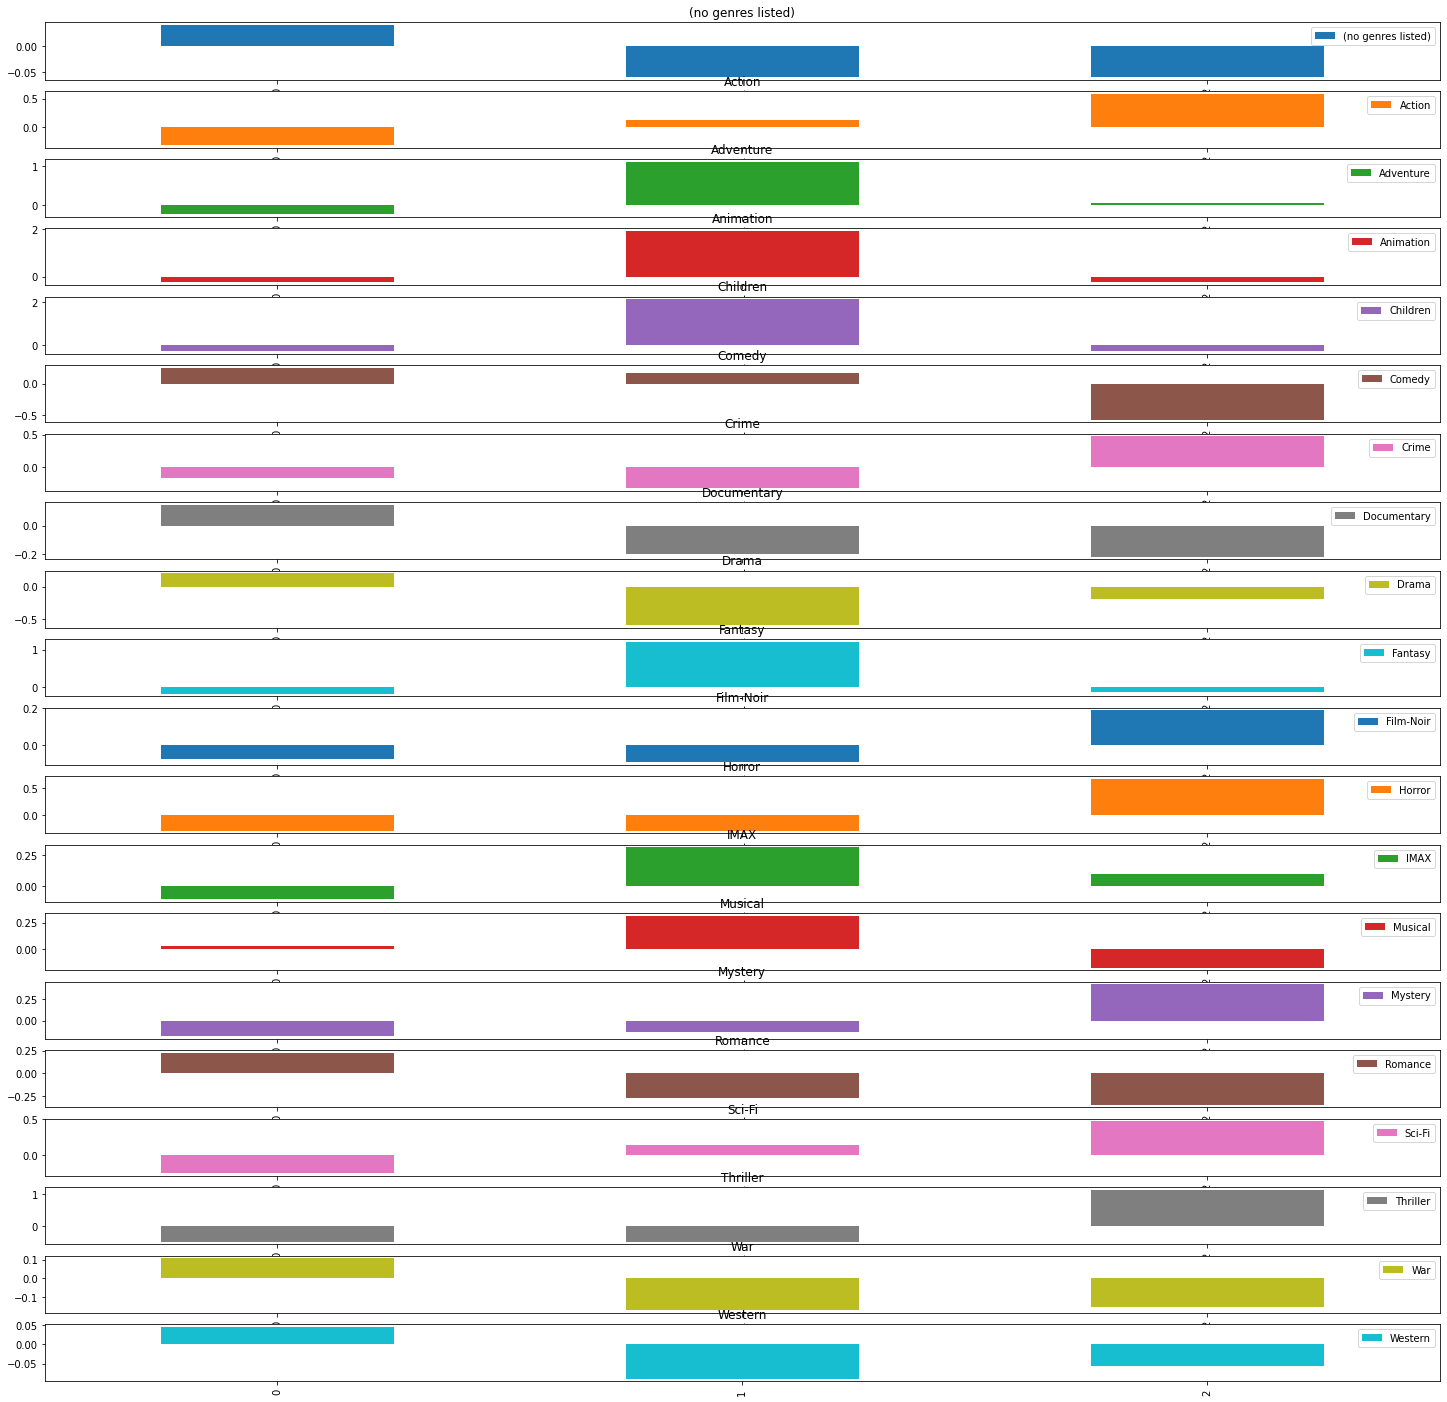

In [11]:
#fazendo gráficos
grupos.plot.bar(subplots = True, figsize=(25 ,25), sharex= False)

In [12]:
#fazendo a transposição do grupo
grupos.transpose()

,0,1,2
(no genres listed),0.040583,-0.059180,-0.059180
Action,-0.315290,0.127558,0.586605
Adventure,-0.233468,1.112051,0.045857
Animation,-0.251542,1.937273,-0.232793
Children,-0.269078,2.121205,-0.267684
Comedy,0.253459,0.161035,-0.572200
Crime,-0.175531,-0.324595,0.477624
Documentary,0.144979,-0.199899,-0.215810
Drama,0.209852,-0.599048,-0.194134
Fantasy,-0.168492,1.206856,-0.121267


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7efa76438>,
      dtype=object)

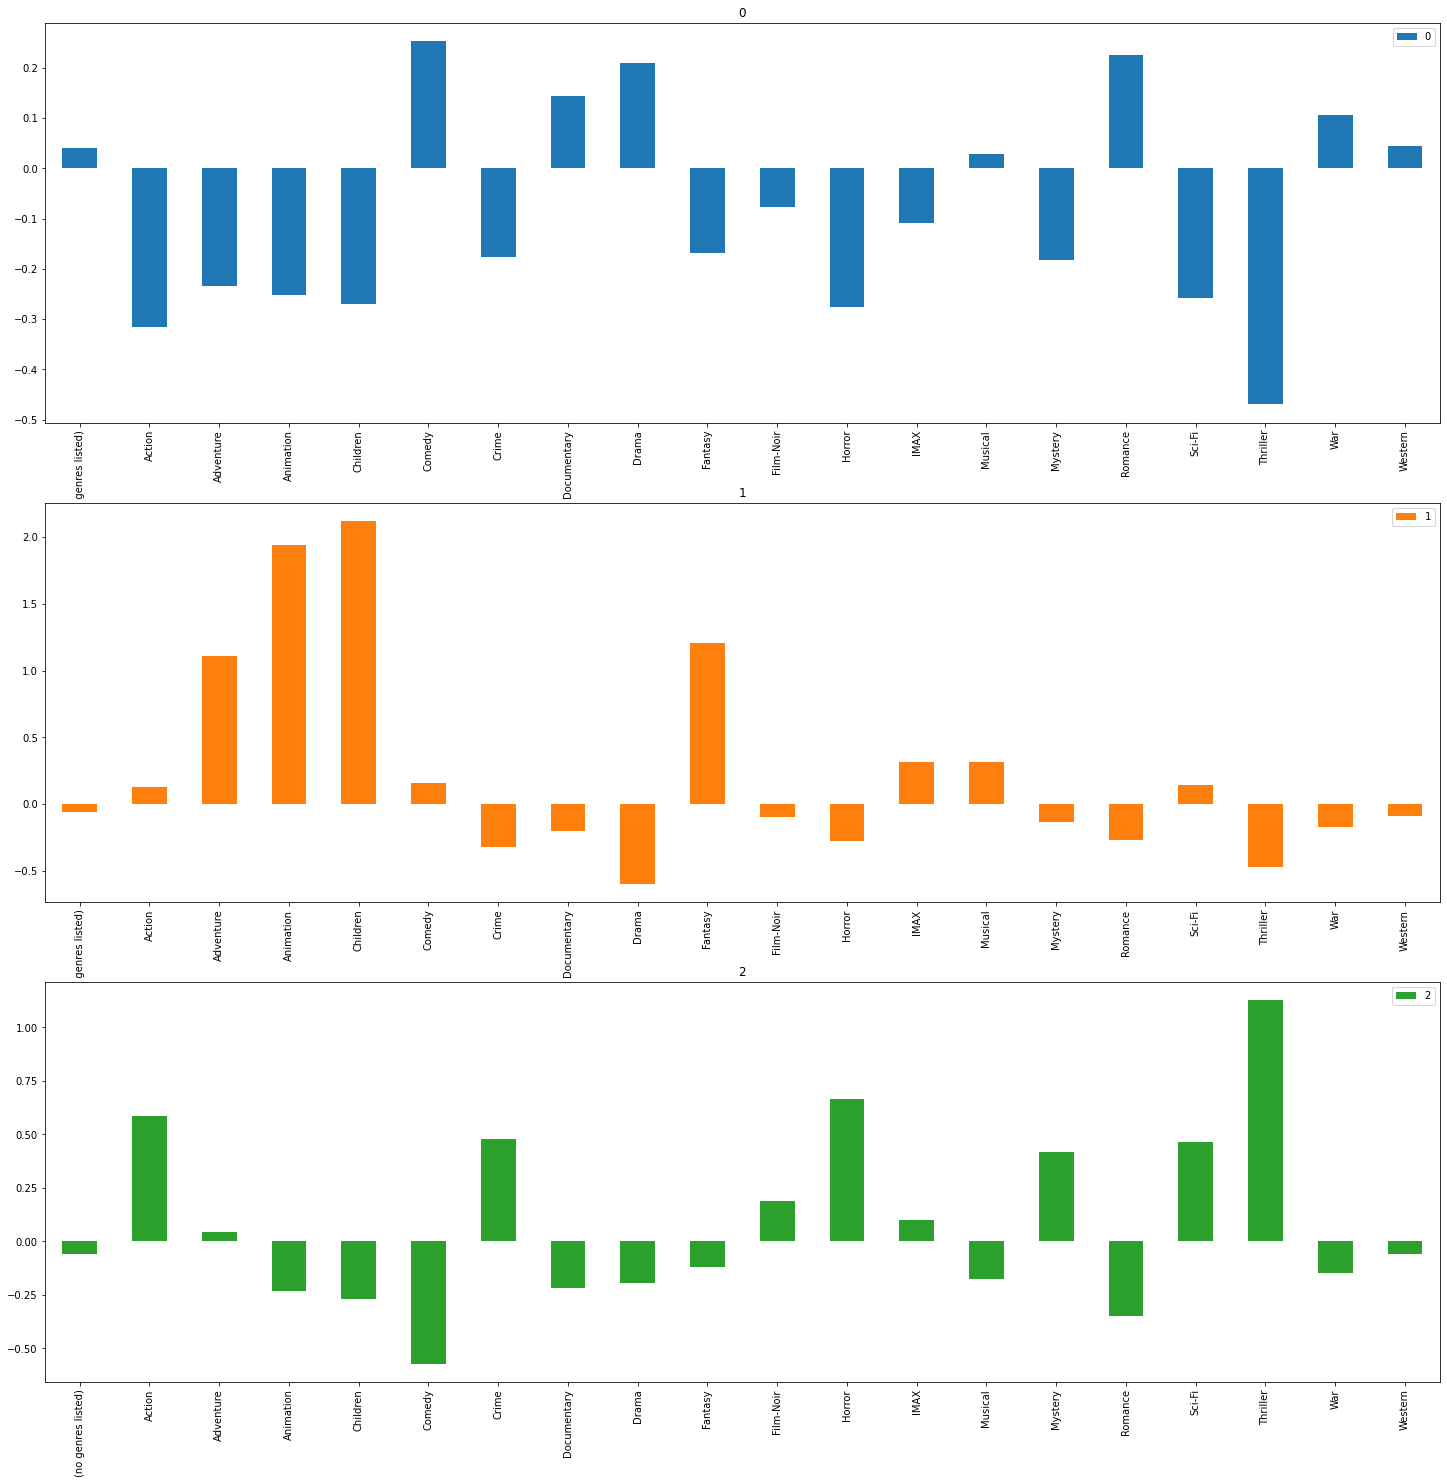

In [13]:
#fazendo gráficos com transpose
grupos.transpose().plot.bar(subplots = True, figsize=(25 ,25), sharex= False)

In [14]:
#validando se o algoritmo fez certo
grupo = 0
filtro = modelo.labels_ == grupo
df_filmes_comp[filtro].sample(10)

,id_filme,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7159,71668,Couples Retreat (2009),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5658,27555,Fubar (2002),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201,235,Ed Wood (1994),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6342,49132,Shut Up & Sing (2006),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
888,1185,My Left Foot (1989),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2391,3173,Any Given Sunday (1999),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4798,7150,Stuck on You (2003),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3954,5572,Barbershop (2002),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3228,4359,"Seven Year Itch, The (1955)",Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5414,25825,Fury (1936),Drama|Film-Noir,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.datasets import make_blobs

In [16]:
dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)

In [17]:
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


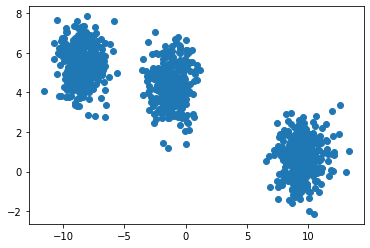

In [18]:
import matplotlib.pyplot as plt

plt.scatter(x=dados.coluna1, y=dados.coluna2)

In [19]:
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)

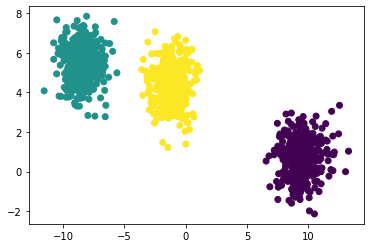

In [20]:
plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis')

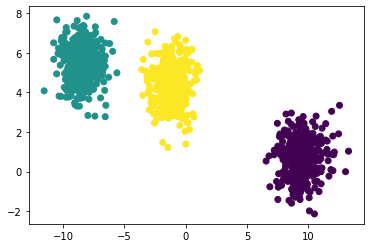

In [21]:
centroides = modelo.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')

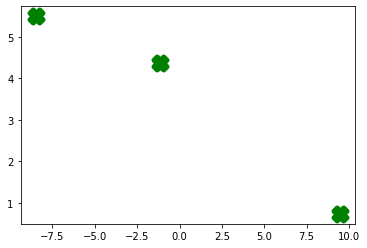

In [22]:
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

In [23]:
#importando biblioteca para gerar graficos
from sklearn.manifold import TSNE

In [24]:
#instanciando o objeto
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 52.578915  , -38.49677   ],
       [ 50.123375  ,   0.47093868],
       [ 17.11232   , -42.897964  ],
       ...,
       [-13.562877  ,   0.40788049],
       [ 23.551859  ,  35.248722  ],
       [ 23.132696  ,  -7.947006  ]], dtype=float32)

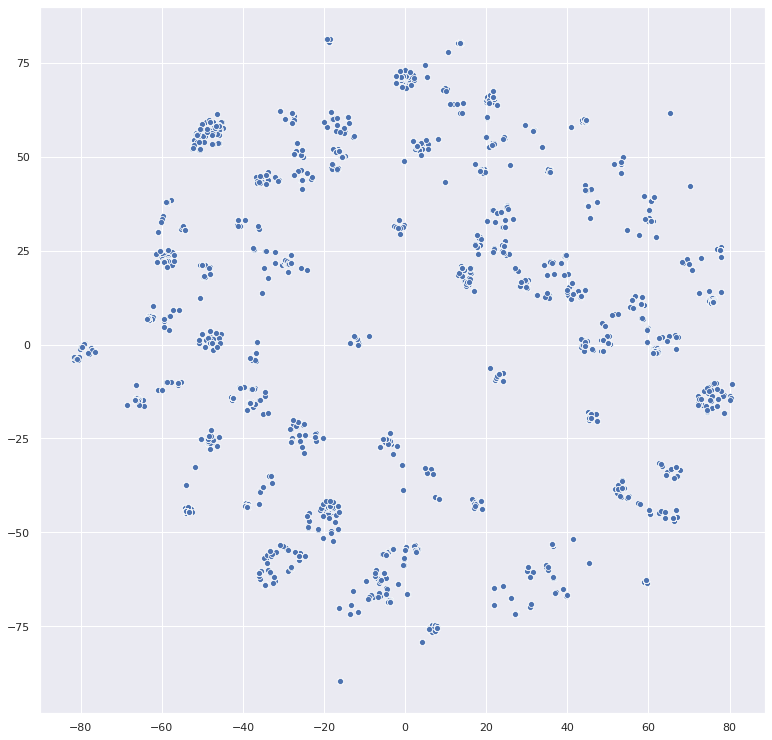

In [26]:
#importando seaborn para plotar os graficos
import seaborn as sns

#alterando o tamanho
sns.set(rc={'figure.figsize' : (13, 13)})


#fazendo um gráfico de dispersão
sns.scatterplot(x= visualizacao[:, 0], y=visualizacao[:, 1])
                

In [30]:
#passo a passo. Continua na célula abaixo.
#instanciando um modleo do kmeans
modelo = KMeans(n_clusters=20)
#treinando o modelo
modelo.fit(generos_escalados)
#criando um df
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
#pegando os 5 primeiros
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,0.804808,2.126214,1.489238,0.496592,-0.150556,-0.340685,-0.199588,-0.571301,3.392017,-0.094926,-0.173243,-0.128397,-0.188419,-0.091986,-0.302017,0.382384,-0.322176,-0.182867,-0.132065
1,-0.05918,-0.158694,-0.349346,-0.258679,-0.265030,-0.393566,-0.212455,-0.217489,-0.606281,-0.274663,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.379886,0.460370,0.606469,-0.202020,-0.132065
2,-0.05918,-0.435919,-0.282069,-0.258679,-0.270451,0.515315,-0.324319,-0.217489,0.313033,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.328329,-0.477337,-0.202020,-0.132065
3,-0.05918,0.499871,-0.266730,-0.248963,-0.270451,-0.160515,2.669289,-0.217489,0.246219,-0.286125,-0.094926,-0.322297,-0.128397,-0.188419,-0.249986,-0.305791,-0.310940,0.687340,-0.202020,-0.132065
4,-0.05918,-0.242537,0.873538,-0.258679,3.697524,0.412947,-0.345363,-0.217489,-0.455495,0.804148,-0.094926,-0.312725,-0.128397,-0.188419,-0.127384,-0.304078,0.006545,-0.483160,-0.202020,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7e98bc5c0>,
      dtype=object)

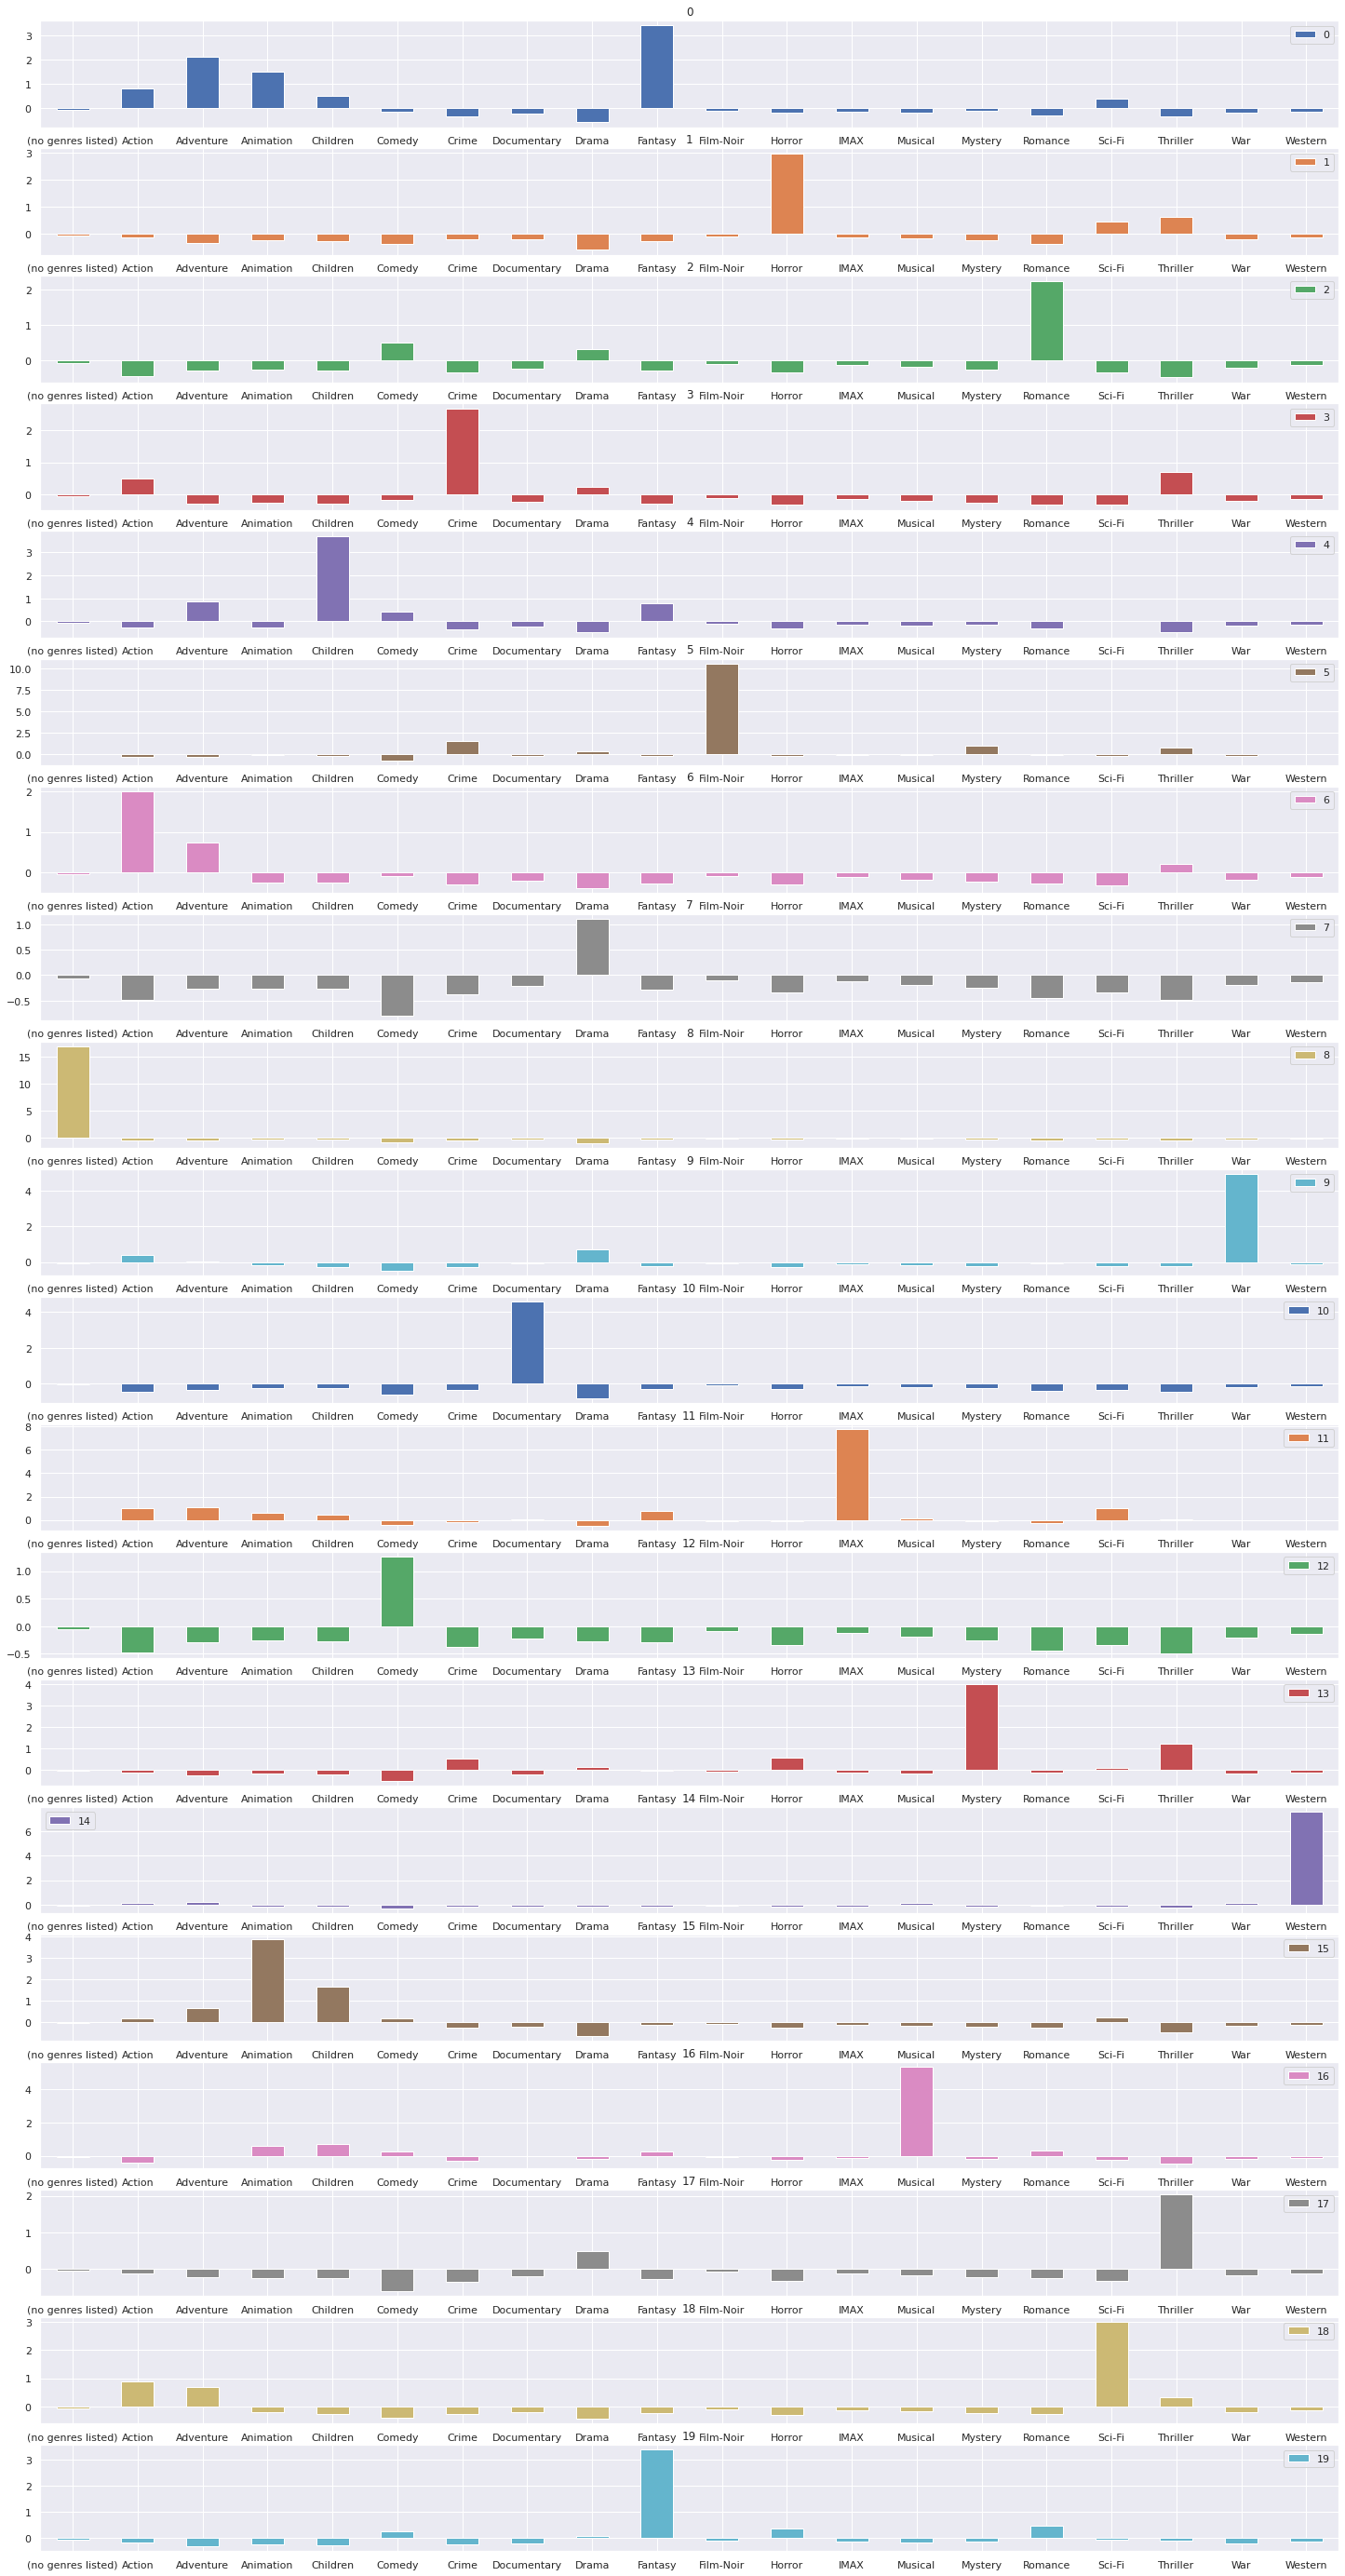

In [33]:
#transpor, para melhorar a visualização do gráfico de barras
grupos.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0)

In [34]:
#fazendo um filtro sobre o grupo 2
grupo = 2
filtro = modelo.labels_ == grupo
df_filmes_comp[filtro].sample(10)

,id_filme,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7410,80241,Going the Distance (2010),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1268,1683,"Wings of the Dove, The (1997)",Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6382,50274,Venus (2006),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3008,4024,"House of Mirth, The (2000)",Romance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5155,8336,"Major and the Minor, The (1942)",Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8561,116413,Life Partners (2014),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2983,3996,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",Action|Drama|Romance,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2214,2942,Flashdance (1983),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4758,7084,"Play It Again, Sam (1972)",Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3986,5620,Sweet Home Alabama (2002),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [35]:
#criando uma função para trabalhar com grupos
def kmeans(num_de_clusters, generos):
  #instanciando o modelo do kmeans
  modelo = KMeans(n_clusters=num_de_clusters)
  #treinando o modelo
  modelo.fit(generos)
  #retornando uma lista de valores
  return [num_de_clusters, modelo.inertia_]


In [36]:
#chamando a função
kmeans(20, generos_escalados)

[20, 55323.93320434651]

In [37]:
#percorrendo os valores dos grupos
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179664.9990790031],
 [3, 166292.33599796717],
 [4, 155798.97588295478],
 [5, 147686.19166023232],
 [6, 137100.3160288026],
 [7, 126926.0252142532],
 [8, 118999.45989974294],
 [9, 111358.60754437014],
 [10, 102854.53690345367],
 [11, 92807.26254683458],
 [12, 87052.25554090444],
 [13, 79597.05988468915],
 [14, 73515.17040422815],
 [15, 68843.49944457416],
 [16, 64928.86656579955],
 [17, 62301.43806857489],
 [18, 58947.149857297954],
 [19, 57284.42340959157],
 [20, 55766.49412257255],
 [21, 53818.43532462691],
 [22, 51348.76734373058],
 [23, 49851.04138573792],
 [24, 50309.546775014234],
 [25, 47274.96336137994],
 [26, 47046.289175940285],
 [27, 45430.14687824195],
 [28, 45315.46924898779],
 [29, 43081.96349103173],
 [30, 43244.12492630519],
 [31, 41531.92042863976],
 [32, 40568.58581460368],
 [33, 38966.157789545476],
 [34, 39663.61131765703],
 [35, 38366.91873537288],
 [36, 37543.80893590024],
 [37, 36897.49005500463],
 [38, 36874.3876986391],
 [39, 35977.701852157

In [39]:
#criando um dataframe 
resultado = pd.DataFrame(resultado,
             columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179664.999079
2,3,166292.335998
3,4,155798.975883
4,5,147686.191660
5,6,137100.316029
6,7,126926.025214
7,8,118999.459900
8,9,111358.607544
9,10,102854.536903


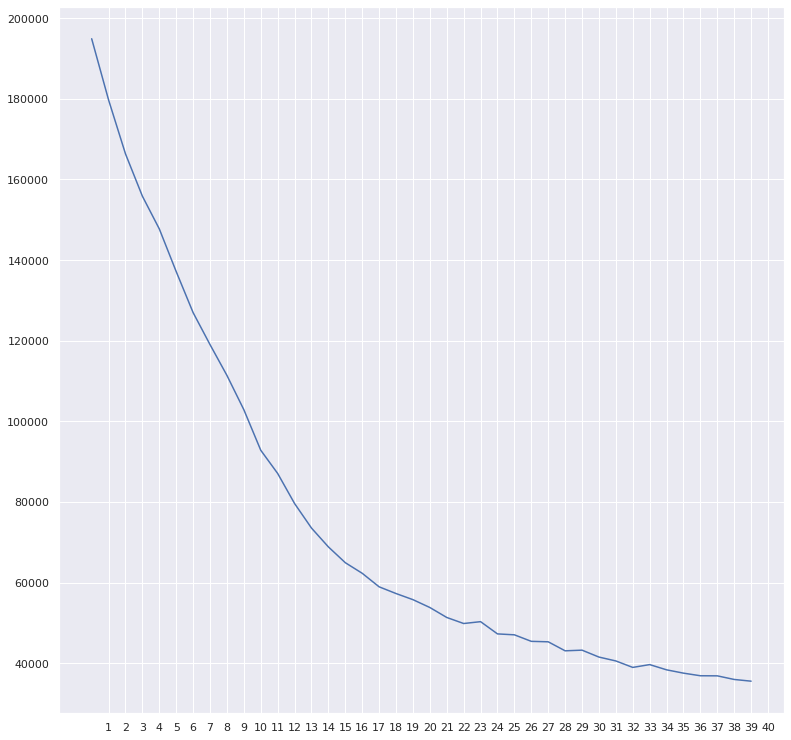

In [42]:
#imprimindo o resultado

resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7e0daf7b8>,
      dtype=object)

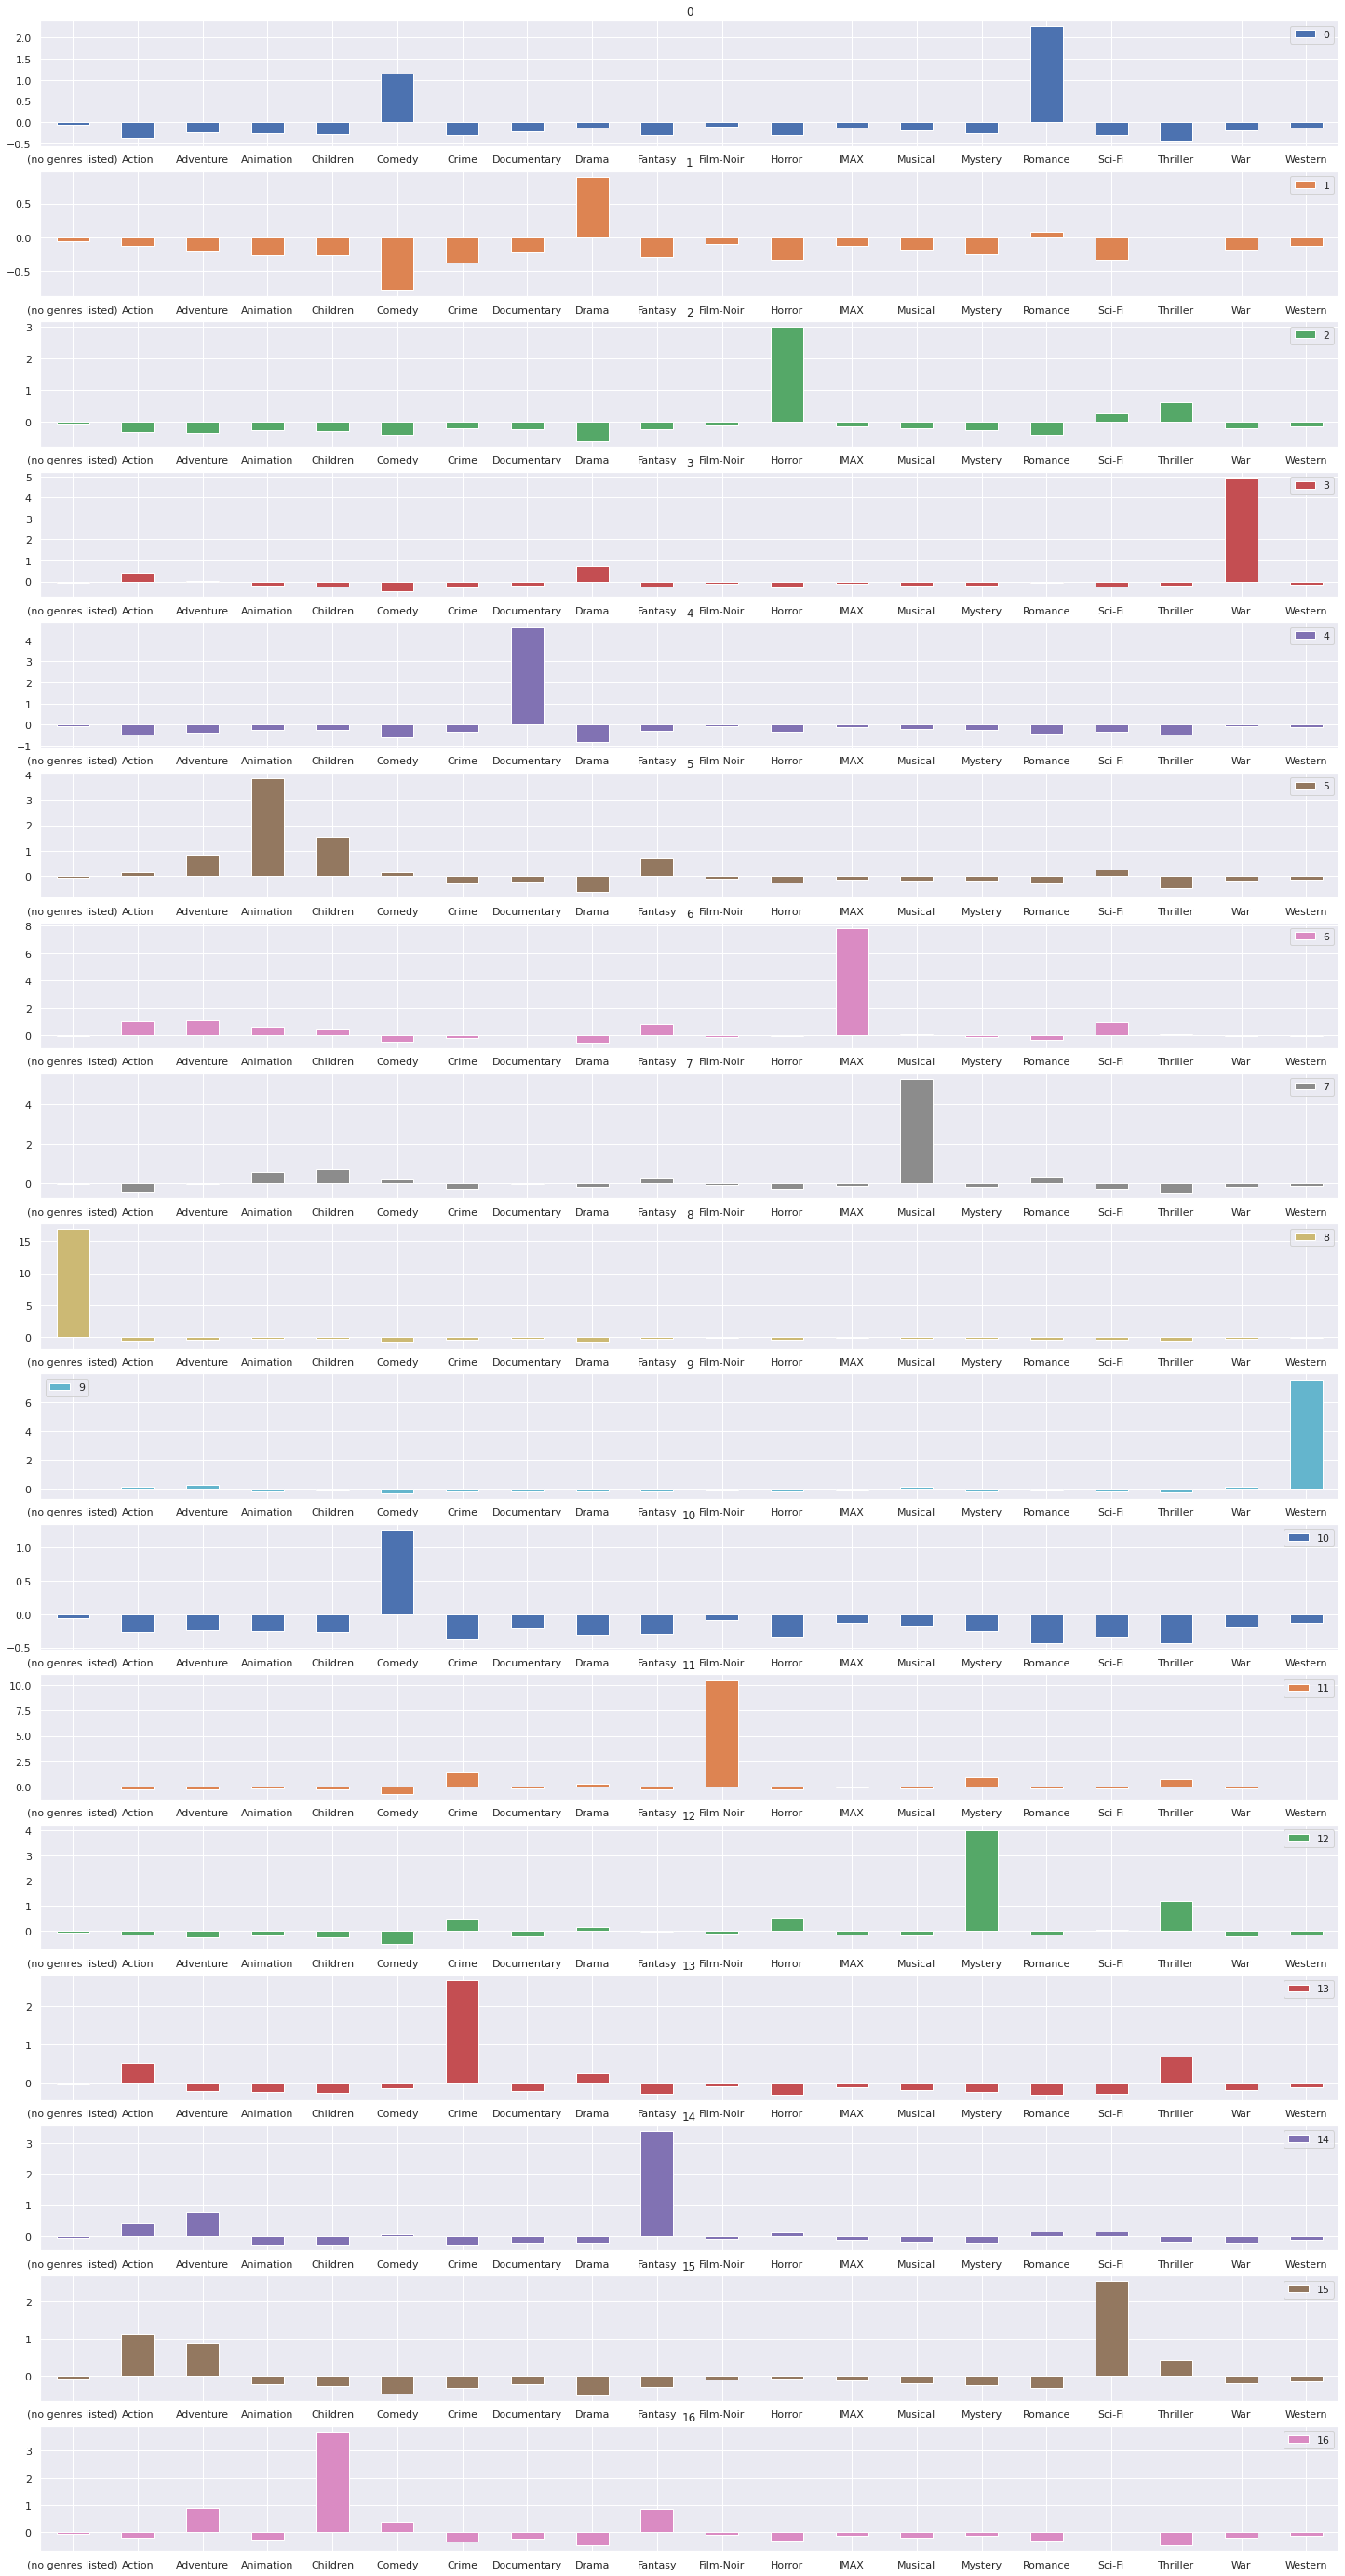

In [43]:
#criando um modelo
modelo = KMeans(n_clusters=17)
#treinando o modelo
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex= False, rot=0)


In [47]:
#fazendo filtros
grupo = 9
filtro = modelo.labels_ == grupo
df_filmes_comp[filtro].sample(10)

,id_filme,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2701,3624,Shanghai Noon (2000),Action|Adventure|Comedy|Western,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
728,948,Giant (1956),Drama|Romance|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
7287,75389,"Burrowers, The (2008)",Horror|Thriller|Western,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3259,4406,"Man Who Shot Liberty Valance, The (1962)",Crime|Drama|Western,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1565,2103,Tall Tale (1995),Adventure|Children|Fantasy|Western,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1408,1928,Cimarron (1931),Drama|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1600,2142,"American Tail: Fievel Goes West, An (1991)",Adventure|Animation|Children|Musical|Western,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5203,8481,Northwest Passage (1940),Action|Adventure|Drama|Romance|Thriller|Western,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
1491,2016,"Apple Dumpling Gang Rides Again, The (1979)",Children|Comedy|Western,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3944,5550,Love Me Tender (1956),Musical|Western,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [48]:
#importando outro modulo da biblioteca sklearn para algoritmo de modo hierárquico
from sklearn.cluster import AgglomerativeClustering

In [49]:
#instanciando o modelo
modelo = AgglomerativeClustering(n_clusters=17)
#treinando o modelo
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [51]:
#instanciando modelo
tsne = TSNE()
#treinando o modelo
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-51.008686 , -50.847824 ],
       [ 40.12062  , -42.835186 ],
       [-26.011055 ,  10.836794 ],
       ...,
       [ -5.3371744,   2.0084498],
       [-53.96456  ,  28.05258  ],
       [ 17.470654 , -25.69848  ]], dtype=float32)

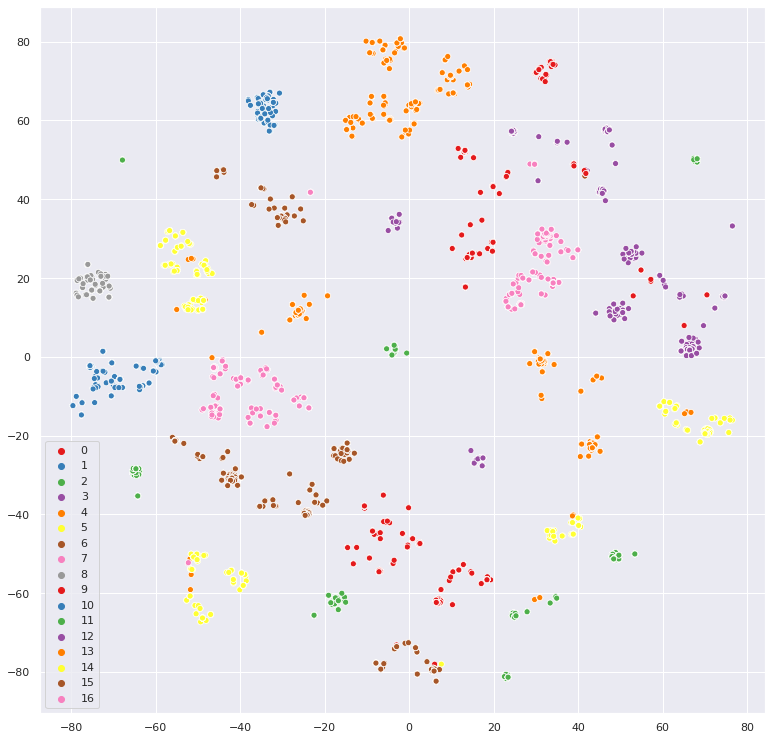

In [56]:
#plotando os gráficos
sns.scatterplot(x= visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=grupos,
                palette=sns.color_palette('Set1', 17))

In [57]:
#plotando um dendograma
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7dfedd6d8>,
      dtype=object)

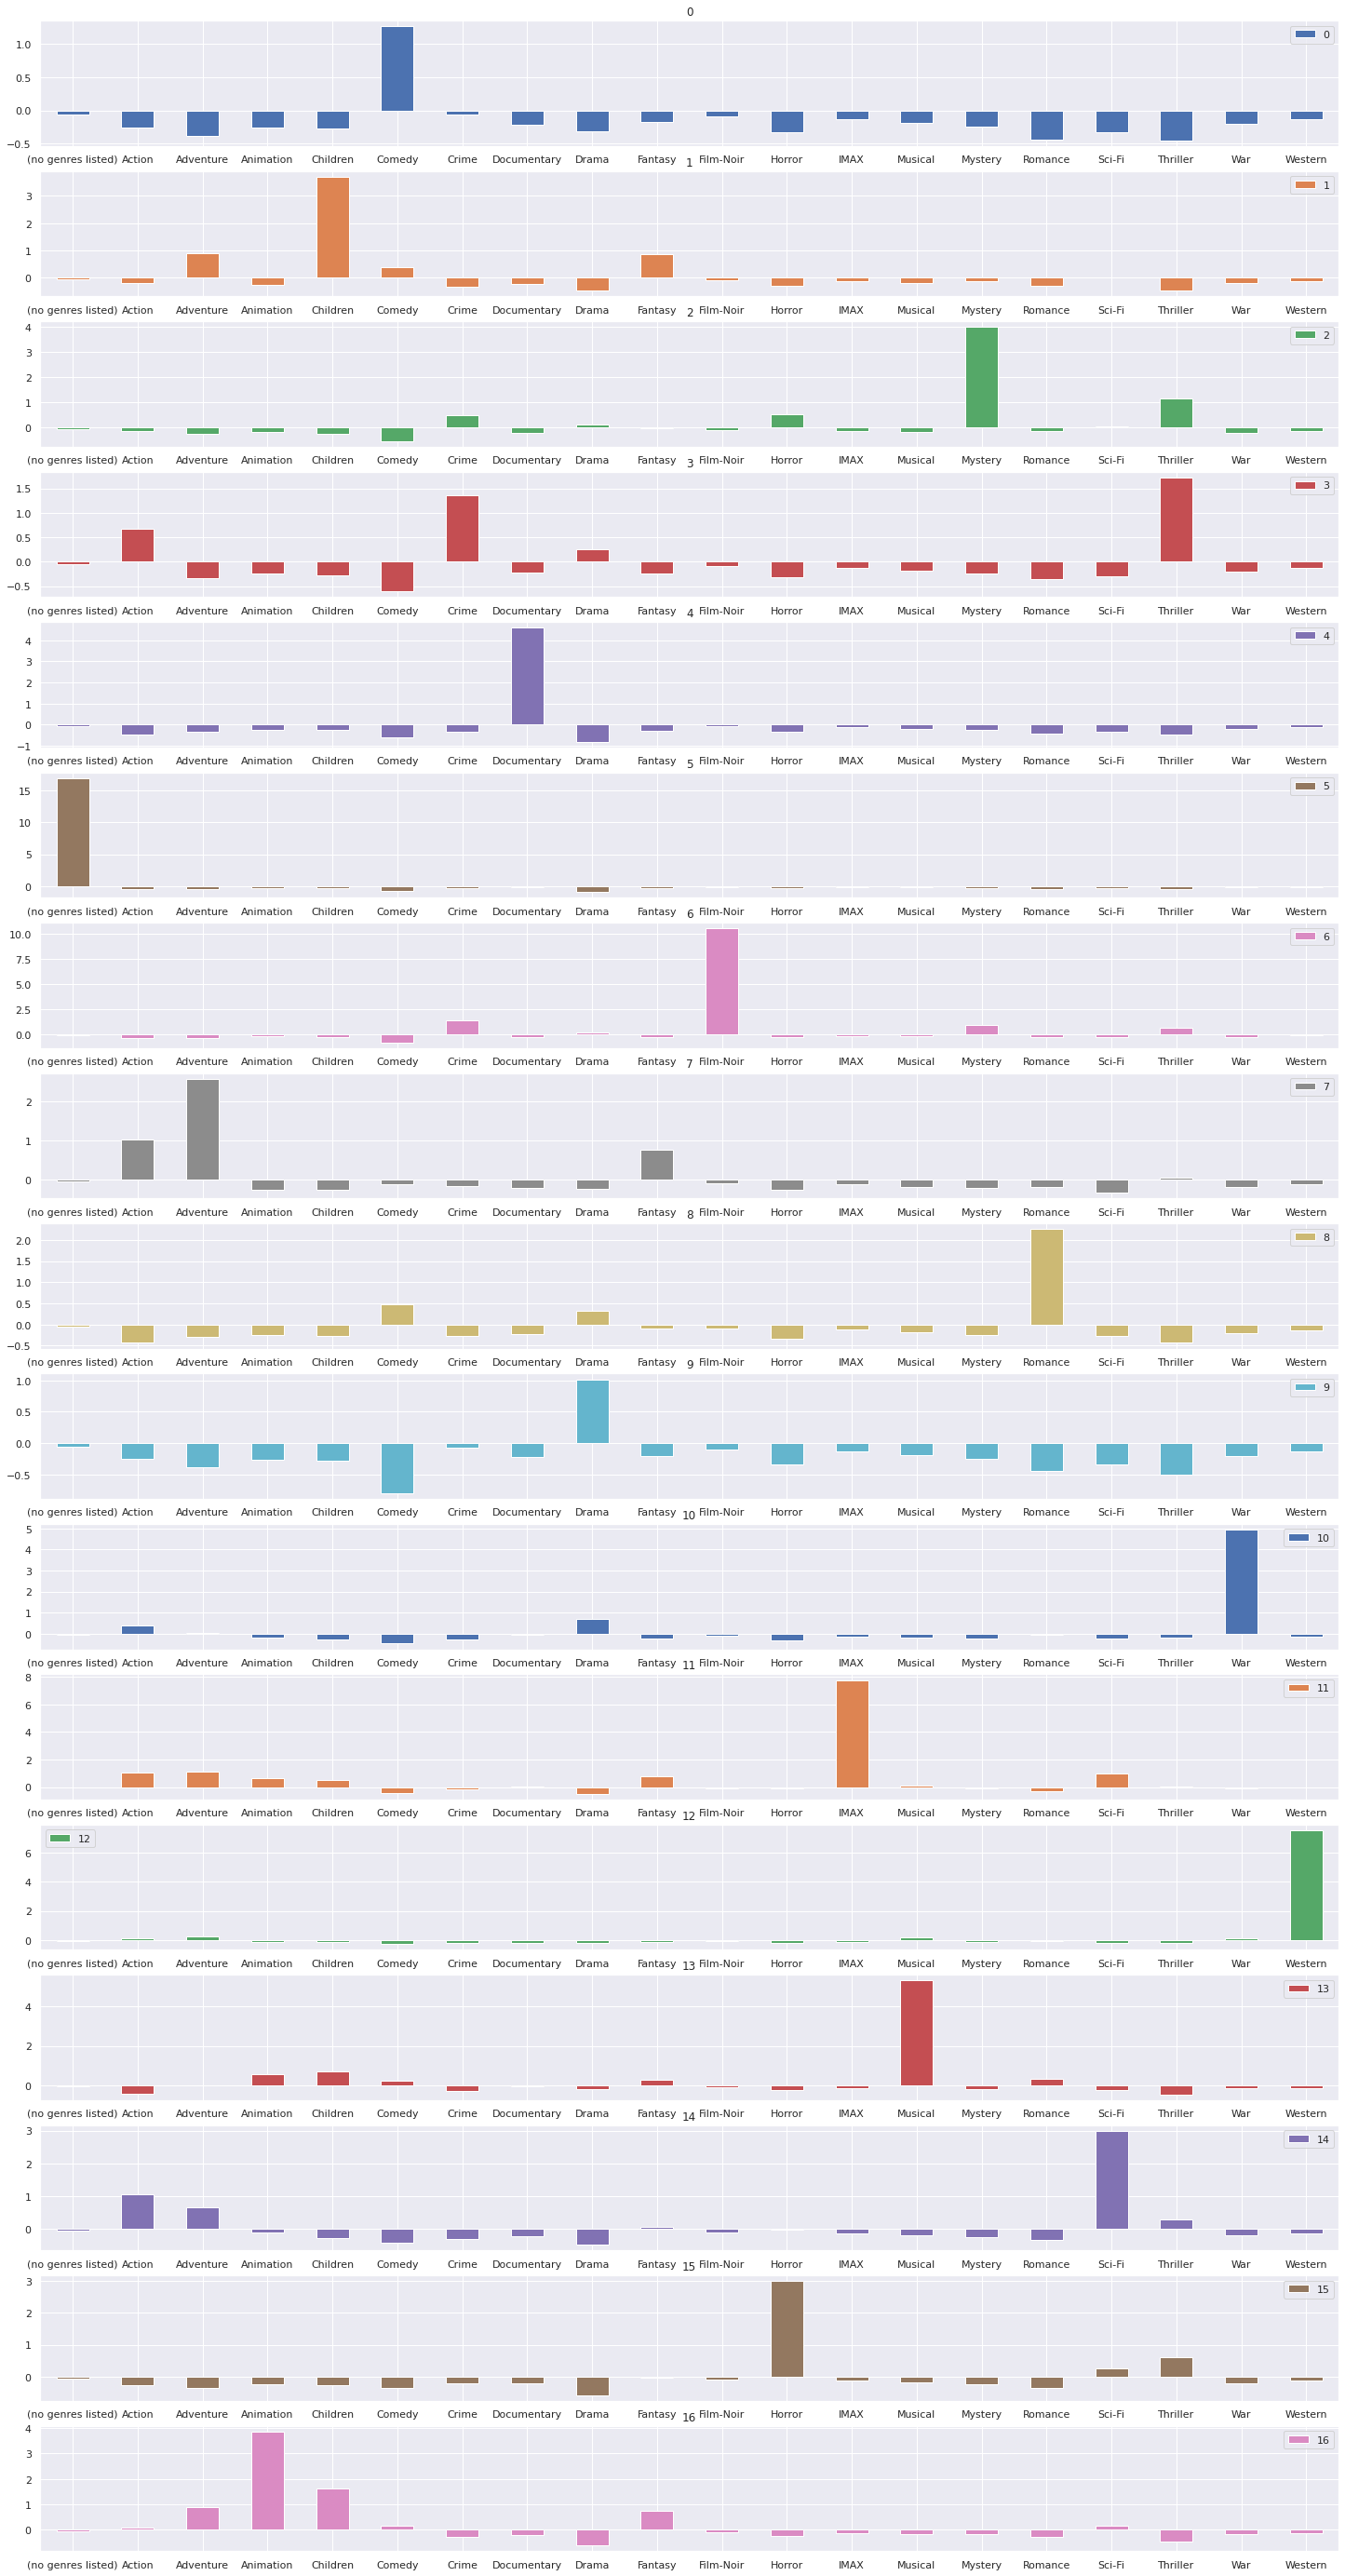

In [58]:
#instanciando o modelo
#a partir da clusterização do kmeans, o dendrogram, irá usar como referencia
modelo = KMeans(n_clusters=17)
#treinando o modelo
modelo.fit(generos_escalados)
#gerando o dataframe
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
#invertendo linhas e colunas
grupos.transpose().plot.bar(subplots=True,
                            figsize=(25, 50),
                            sharex=False,
                            rot=0)

In [59]:
#gerando a matriz de distancia
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 0.        ,  9.        ,  2.44896149,  2.        ],
       [ 3.        , 17.        ,  2.9006929 ,  3.        ],
       [ 8.        , 18.        ,  2.90146592,  4.        ],
       [ 7.        , 19.        ,  3.68323825,  5.        ],
       [15.        , 20.        ,  3.90864182,  6.        ],
       [14.        , 21.        ,  3.93896277,  7.        ],
       [ 1.        , 22.        ,  4.41827804,  8.        ],
       [ 2.        , 23.        ,  4.55867223,  9.        ],
       [16.        , 24.        ,  4.64146196, 10.        ],
       [ 4.        , 25.        ,  5.16459745, 11.        ],
       [10.        , 26.        ,  5.25437287, 12.        ],
       [13.        , 27.        ,  5.82801038, 13.        ],
       [12.        , 28.        ,  7.87734953, 14.        ],
       [11.        , 29.        ,  8.26095335, 15.        ],
       [ 6.        , 30.        , 10.79409282, 16.        ],
       [ 5.        , 31.        , 17.06924336, 17.        ]])

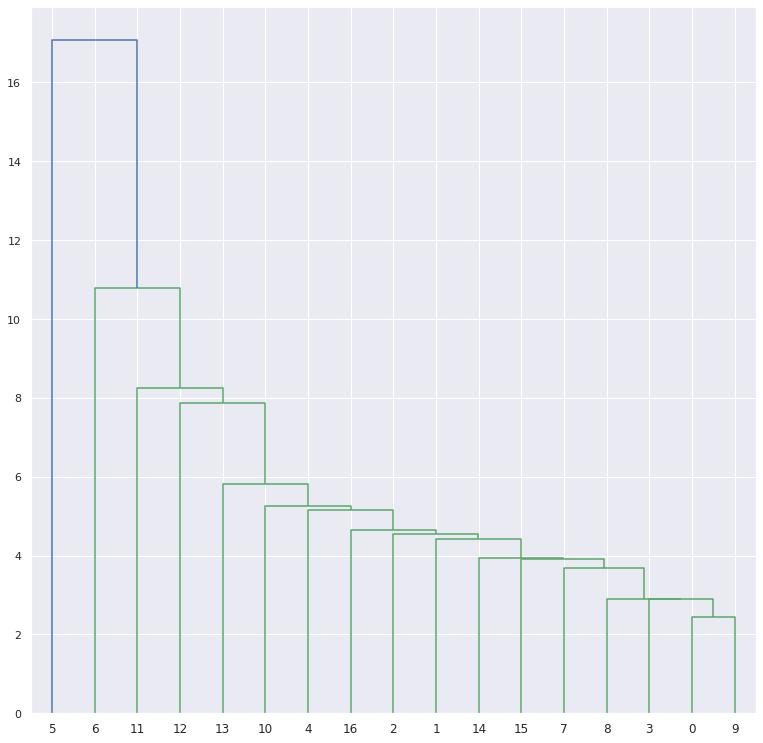

In [62]:
#plotando o dendrogram
dendrograma = dendrogram(matriz_de_distancia)

In [63]:
#outra forma de agrupamento
from sklearn.cluster import DBSCAN

In [64]:
#inicializando o modelo
modelo = DBSCAN()
#treinando o modelo
grupos = modelo.fit_predict(dados)

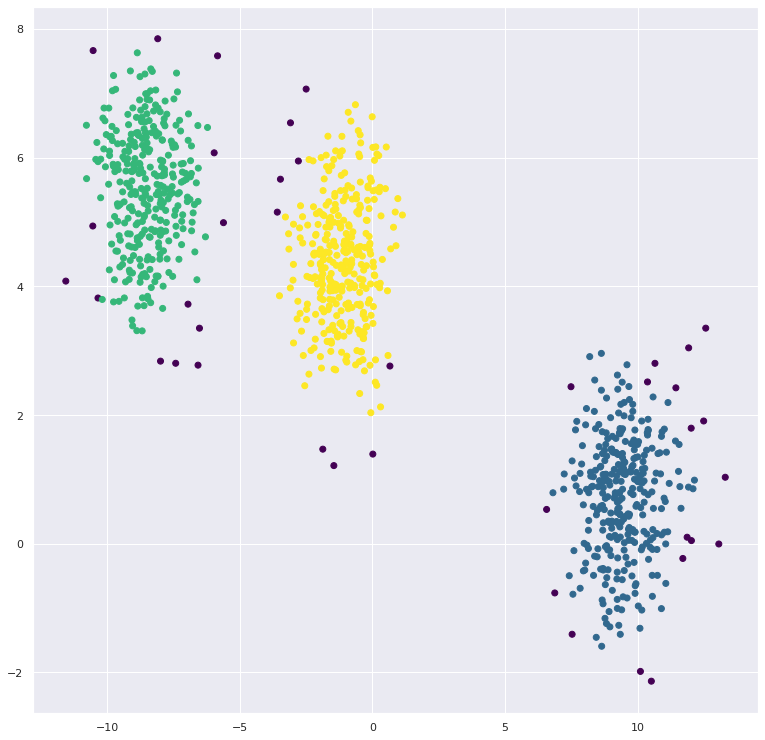

In [65]:
#plotando o gráfico
plt.scatter(x=dados.coluna1,y=dados.coluna2,
            c=grupos,
            cmap='viridis')